In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

/Users/koshkin/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/koshkin/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


/Users/koshkin/miniconda3/lib/python3.6/site-packages/keras/preprocessing/image.py:544: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


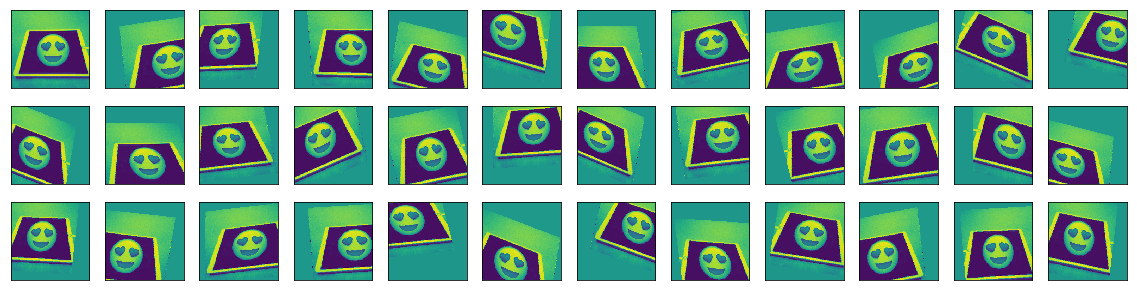

In [3]:
image_size = (224,224)

img = load_img('../images/all_multiclass/train/hearteyes/hearteyes-9.jpeg', grayscale=True, target_size=image_size)  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
fig = plt.figure(1, figsize=(20,5))
n_r, n_c = 3, 12
plt.subplot(n_r, n_c, 1, xticks=[], yticks=[])
plt.imshow(img_to_array(img).reshape(image_size))
i+=1

datagen = ImageDataGenerator(
        rescale = 1/255.,
        rotation_range=15,
        width_shift_range=0.3,
        height_shift_range=0.3,
        featurewise_std_normalization=True,
        shear_range=0.3,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='constant',
        cval=255./2)

for item in datagen.flow(x):
    plt.subplot(n_r, n_c, i+1, xticks=[], yticks=[])
    plt.imshow(item[0].reshape(item.shape[1:3]))
    i+=1
    if i > n_r * n_c - 1:
        break

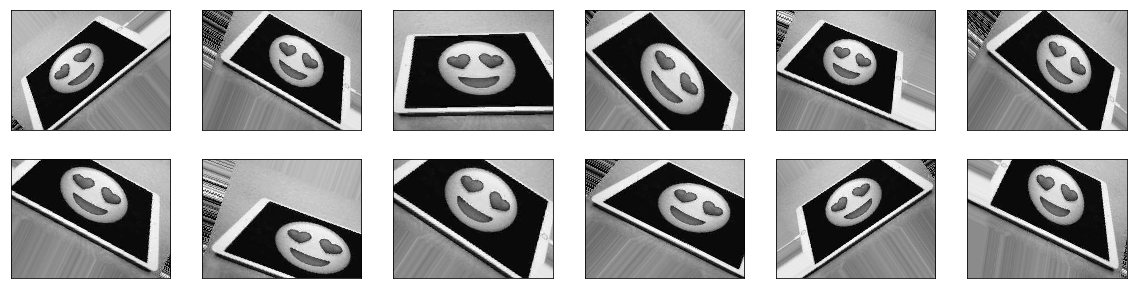

In [10]:
fig = plt.figure(figsize=(20,5))
fnames = [f for f in os.listdir('./processed') if f.endswith('.jpeg')]

for i in range(12):
    ax = fig.add_subplot(2, 6, i + 1, xticks=[], yticks=[])
    img = load_img(os.path.join('./processed',fnames[i]))
    ax.imshow(img)

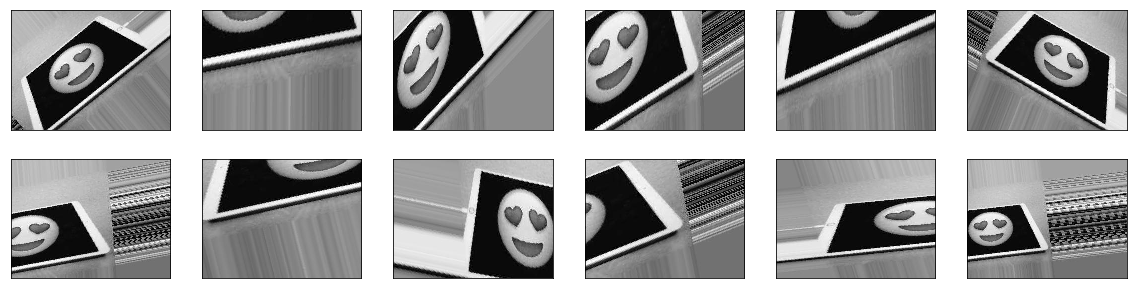

In [30]:
fig = plt.figure(figsize=(20,5))
fnames = [f for f in os.listdir('./processed') if f.endswith('.jpeg')]

for i in range(12):
    ax = fig.add_subplot(2, 6, i + 1, xticks=[], yticks=[])
    img = load_img(os.path.join('./processed',fnames[i]))
    ax.imshow(img)